In [36]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import datetime
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

import plotly.graph_objs as go
sns.set_style("darkgrid")

In [14]:
alpha = 0.05
beta = 0.2

In [32]:
def duration(k, delta_effect, sigma_1, sigma_2, alpha=0.05, beta=0.2):
    z = sps.norm.ppf(1 - alpha/2) + sps.norm.ppf(1-beta)
    n = (k + 1) * z ** 2 * (sigma_1 ** 2 + sigma_2 ** 2 / k) / (delta_effect ** 2)
    return n

In [7]:
df = pd.read_csv("ab_made_4.gzip", compression='gzip')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s') + datetime.timedelta(hours=3)


group_nan = df[df['group'].isna()]
group_a = df[df['group'] == 'A']
group_b = df[df['group'] == 'B']


In [8]:
group_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25759 entries, 0 to 25758
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    25759 non-null  datetime64[ns]
 1   id_user      25759 non-null  object        
 2   sum_payment  25759 non-null  int64         
 3   group        0 non-null      object        
 4   city         25759 non-null  object        
 5   id_product   25758 non-null  float64       
 6   is_pay       25759 non-null  int64         
 7   date         25759 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.8+ MB


In [9]:
group_nan.describe()

,timestamp,sum_payment,id_product,is_pay,date
count,25759,25759.000000,25758.000000,25759.000000,25759
mean,2023-04-23 11:03:16.919290624,5.479638,10.506406,0.257852,2023-04-22 22:34:34.832097536
min,2023-04-01 03:40:17,0.000000,0.000000,0.000000,2023-04-01 00:00:00
25%,2023-04-19 09:52:50.500000,0.000000,5.000000,0.000000,2023-04-19 00:00:00
50%,2023-04-25 09:42:41,0.000000,11.000000,0.000000,2023-04-25 00:00:00
75%,2023-04-28 23:26:57,11.000000,16.000000,1.000000,2023-04-28 00:00:00
max,2023-04-30 23:59:46,1000.000000,21.000000,1.000000,2023-04-30 00:00:00
std,NaN,12.142196,6.328429,0.437460,NaN


In [10]:
group_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15389 entries, 25759 to 56402
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    15389 non-null  datetime64[ns]
 1   id_user      15389 non-null  object        
 2   sum_payment  15389 non-null  int64         
 3   group        15389 non-null  object        
 4   city         15389 non-null  object        
 5   id_product   15387 non-null  float64       
 6   is_pay       15389 non-null  int64         
 7   date         15389 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
group_a.describe()

,timestamp,sum_payment,id_product,is_pay,date
count,15389,15389.000000,15387.000000,15389.000000,15389
mean,2023-05-24 07:22:27.248878848,6.132562,10.456229,0.283904,2023-05-23 18:50:21.950744064
min,2023-05-01 08:48:05,0.000000,0.000000,0.000000,2023-05-01 00:00:00
25%,2023-05-20 06:28:23,0.000000,5.000000,0.000000,2023-05-20 00:00:00
50%,2023-05-26 06:44:13,0.000000,10.000000,0.000000,2023-05-26 00:00:00
75%,2023-05-29 23:43:04,12.000000,16.000000,1.000000,2023-05-29 00:00:00
max,2023-05-31 23:59:57,1000.000000,21.000000,1.000000,2023-05-31 00:00:00
std,NaN,15.703604,6.335640,0.450905,NaN


In [12]:
group_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15257 entries, 25760 to 56404
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    15257 non-null  datetime64[ns]
 1   id_user      15257 non-null  object        
 2   sum_payment  15257 non-null  int64         
 3   group        15257 non-null  object        
 4   city         15257 non-null  object        
 5   id_product   15257 non-null  float64       
 6   is_pay       15257 non-null  int64         
 7   date         15257 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [13]:
group_b.describe()

,timestamp,sum_payment,id_product,is_pay,date
count,15257,15257.000000,15257.000000,15257.000000,15257
mean,2023-05-24 06:47:00.704922368,6.578554,10.450678,0.312840,2023-05-23 18:25:13.429901056
min,2023-05-01 01:43:46,0.000000,0.000000,0.000000,2023-05-01 00:00:00
25%,2023-05-20 04:59:28,0.000000,5.000000,0.000000,2023-05-20 00:00:00
50%,2023-05-26 05:15:54,0.000000,10.000000,0.000000,2023-05-26 00:00:00
75%,2023-05-29 23:47:15,13.000000,16.000000,1.000000,2023-05-29 00:00:00
max,2023-05-31 23:58:59,53.000000,21.000000,1.000000,2023-05-31 00:00:00
std,NaN,11.182955,6.321586,0.463665,NaN


In [15]:
final_date = pd.to_datetime('2023-05-31', format='%Y-%m-%d')

In [19]:
lower_bound = group_nan.sum_payment.quantile(0.05)
upper_bound = group_nan.sum_payment.quantile(0.95)
emission_df = group_nan[~((group_nan.sum_payment < lower_bound) & (group_nan.sum_payment > upper_bound))]

In [26]:
group_nan.loc[group_nan.index.isin(emission_df.index), "sum_payment"] = group_nan.loc[group_nan.index.isin(emission_df.index), "sum_payment"].apply(lambda x: min(x, upper_bound))

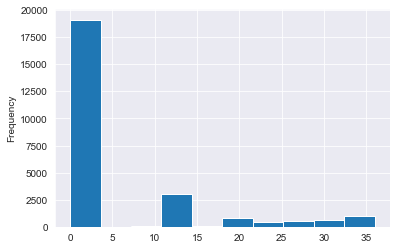

In [31]:
group_nan['sum_payment'].plot.hist();

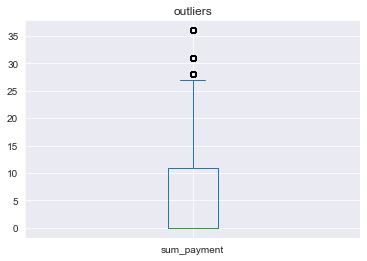

In [29]:
group_nan['sum_payment'].plot.box()
plt.title('outliers');

In [37]:
def get_total_payments(data_frame, ending_date):
    filtered_data = (
        data_frame.groupby("id_user").timestamp.min().reset_index(name="min_timestamp")
    )

    filtered_data["max_timestamp"] = filtered_data["min_timestamp"] + timedelta(seconds=7 * 24 * 60 * 60)

    merged_data = data_frame.merge(filtered_data, on="id_user")

    filtered_data = merged_data[
        (merged_data["timestamp"] <= merged_data["max_timestamp"])
        & (merged_data["timestamp"] >= merged_data["min_timestamp"])
    ]
    
    filtered_data = filtered_data[
        pd.to_datetime(filtered_data["max_timestamp"]).dt.normalize() <= ending_date
    ]

    total_payments = filtered_data.groupby("id_user").sum_payment.sum().tolist()
    return total_payments


In [38]:

total_payments = get_total_payments(group_nan, ending_date=pd.to_datetime('2023-04-30', format='%Y-%m-%d'))

sigma_1 = np.std(total_payments)
sigma_2 = np.std(total_payments)
effect = 0.1 *  np.mean(total_payments)

mean_base = np.mean(total_payments)

k = group_a['id_user'].nunique() / group_b['id_user'].nunique()

In [43]:
target_n = 0.5 * duration(k, effect, sigma_1, sigma_2, alpha=0.05, beta=0.2) 
int(target_n)

3554

#### Фильтрация данных

In [44]:
def find_filtering_date(data_frame, target_count):
    start_date = pd.to_datetime("2023-05-01", format="%Y-%m-%d") + timedelta(days=7)

    while start_date != final_date:
        temp_df = data_frame[data_frame["date"] <= start_date]
        
        filtered_data = (
            temp_df.groupby("id_user").timestamp.min().reset_index(name="min_timestamp")
        )

        filtered_data["max_timestamp"] = filtered_data["min_timestamp"] + timedelta(seconds=7 * 24 * 60 * 60)

        filtered_data = filtered_data[pd.to_datetime(filtered_data["max_timestamp"]).dt.normalize() <= start_date]

        if filtered_data["id_user"].nunique() >= target_count:
            return start_date

        start_date = start_date + timedelta(days=1)

    return start_date

In [45]:
a_date = find_filtering_date(group_a, target_n)
b_date = find_filtering_date(group_b, target_n)

if a_date == b_date:
    final_date = a_date
else:
    final_date = max(a_date, b_date)

In [46]:
group_a =  group_a[group_a['date'] <= final_date]
group_b =  group_b[group_b['date'] <= final_date]

#### A-группа

In [48]:
lower_bound = group_a.sum_payment.quantile(q=0.05)
upper_bound = group_a.sum_payment.quantile(q=0.95)
emission_df = group_a[~((group_a.sum_payment < lower_bound) & (group_a.sum_payment > upper_bound))]

In [49]:
group_a.loc[group_a.index.isin(emission_df.index), "sum_payment"] = group_a.loc[group_a.index.isin(emission_df.index), "sum_payment"].apply(lambda x: min(x, upper_bound))

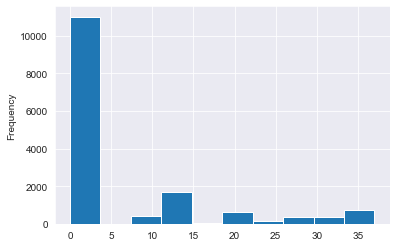

In [52]:
group_a['sum_payment'].plot.hist();

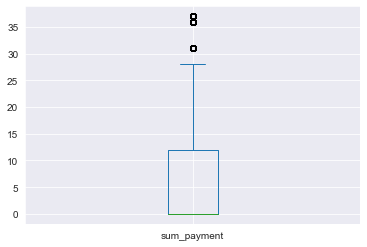

In [51]:
group_a['sum_payment'].plot.box();

#### B-группа

In [56]:
lower_bound = group_b.sum_payment.quantile(q=0.97)
upper_bound = group_b.sum_payment.quantile(q=0.03)
emission_df = group_b[~((group_b.sum_payment < lower_bound) & (group_b.sum_payment > upper_bound))]

In [57]:
group_b.loc[group_b.index.isin(emission_df.index), "sum_payment"] = group_b.loc[group_b.index.isin(emission_df.index), "sum_payment"].apply(lambda x: min(x, upper_bound))

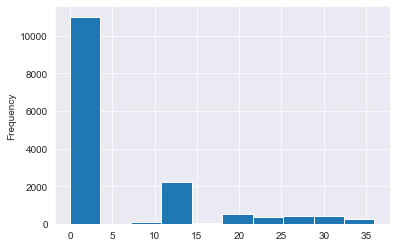

In [60]:
group_b.sum_payment.plot.hist();

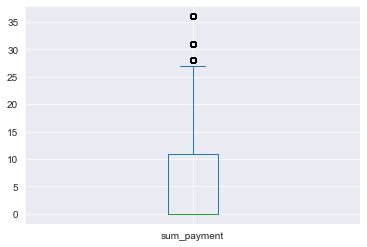

In [59]:
group_b.sum_payment.plot.box();

# Эксперимент

In [62]:
d = pd.to_datetime("2023-05-01", format="%Y-%m-%d") + timedelta(days=7)

res = pd.DataFrame(
    columns=["metric_a", "metric_b", "effect", "t", "p_value"],
    index=pd.date_range(d, final_date),
)

for date in res.index:
    tmp_a = get_total_payments(group_a[group_a["date"] <= date], ending_date=date)
    tmp_b = get_total_payments(group_b[group_b["date"] <= date], ending_date=date)

    effect = np.mean(tmp_b) - np.mean(tmp_a)

    results = sps.ttest_ind(tmp_a, tmp_b, equal_var=abs(np.var(tmp_b) - np.var(tmp_a)) <= 0.1)
    
    t_value, p_value = results.statistic, results.pvalue
    res.loc[date] = np.mean(tmp_a), np.mean(tmp_b), effect, t_value, p_value

In [64]:
res.tail()

,metric_a,metric_b,effect,t,p_value
2023-05-27,10.621577,9.618666,-1.002911,2.308947,0.020989
2023-05-28,10.599548,9.706422,-0.893125,2.155271,0.031186
2023-05-29,10.765862,9.874657,-0.891205,2.213024,0.026935
2023-05-30,11.027027,9.975633,-1.051394,2.675966,0.007471
2023-05-31,11.281241,10.191031,-1.09021,2.813325,0.004917


In [70]:
res['p_value'].iloc[-1] <= alpha

True

### Отвергаем нулевую гипотезу, эффект есть